## Speedup Machine Learning using Dask Dataframe 

#### Dask is a flexible library for parallel computing in Python. A Dask DataFrame is a large parallel DataFrame composed of many smaller Pandas DataFrames, split along the index. These Pandas DataFrames may live on disk for larger-than-memory computing on a single machine, or on many different machines in a cluster. One Dask DataFrame operation triggers many operations on the constituent Pandas DataFrames.
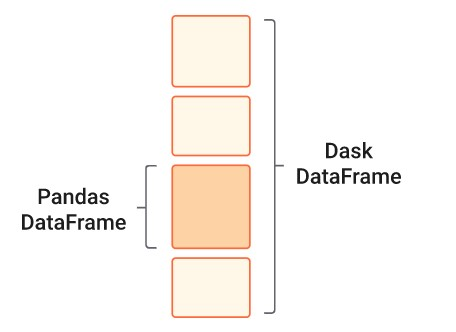

**REFERENCES**
1. https://docs.dask.org/en/stable/
2. https://ml.dask.org/xgboost.html
3. https://docs.dask.org/en/stable/dataframe.html
4. https://xgboost.readthedocs.io/en/stable/get_started.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dask.distributed import Client
from dask_ml.preprocessing import OneHotEncoder
import dask.dataframe as dd
import dask
import time
client = Client()
client

Client Scheduler: tcp://127.0.0.1:51761 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 12 Memory: 15.85 GiB


### Read Data

In [2]:
start_time = time.time()
dd_csv=dd.read_csv('2020_taxi_trips - Copy.csv',assume_missing=True)
print("----------------------------------")
print(" | Dask Time:  %s seconds |" % (time.time() - start_time))
print("----------------------------------")

----------------------------------
 | Dask Time:  0.01996922492980957 seconds |
----------------------------------


In [3]:
start_time = time.time()
data = pd.read_csv('2020_taxi_trips - Copy.csv')
print("----------------------------------")
print(" | Pandas Time:  %s seconds |" % (time.time() - start_time))
print("----------------------------------")

----------------------------------
 | Pandas Time:  0.697197437286377 seconds |
----------------------------------


In [4]:
%time
df=dd_csv
df.head(2)

Wall time: 998 µs


,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,1.0,74.0,75.0,1.0,1.47,6.5,0.0,0.5,0.0,0.0,0.3,7.3,2.0,1.0,0.0
1,2.0,1.0,74.0,75.0,1.0,1.49,6.5,0.0,0.5,0.0,0.0,0.3,7.3,2.0,1.0,0.0


In [5]:
%time
df1 = data
df1.head(2)

Wall time: 0 ns


,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,1.0,74,75,1.0,1.47,6.5,0.0,0.5,0.0,0,0.3,7.3,2.0,1.0,0.0
1,2.0,1.0,74,75,1.0,1.49,6.5,0.0,0.5,0.0,0,0.3,7.3,2.0,1.0,0.0


## EDA

In [6]:
#Dask dataframe
df.compute()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,1.0,74.0,75.0,1.0,1.47,6.5,0.0,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.00
1,2.0,1.0,74.0,75.0,1.0,1.49,6.5,0.0,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.00
2,2.0,1.0,74.0,75.0,1.0,1.31,6.5,0.0,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.00
3,2.0,1.0,74.0,75.0,1.0,1.43,6.5,0.0,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.00
4,2.0,1.0,74.0,75.0,1.0,1.10,6.5,0.0,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2.0,1.0,166.0,181.0,1.0,10.51,40.0,0.5,0.5,8.81,0.0,0.3,52.86,1.0,1.0,2.75
1048571,2.0,1.0,166.0,186.0,1.0,5.07,19.0,0.5,0.5,4.61,0.0,0.3,27.66,1.0,1.0,2.75
1048572,2.0,1.0,166.0,79.0,1.0,7.32,24.5,0.5,0.5,2.50,0.0,0.3,31.05,1.0,1.0,2.75
1048573,2.0,1.0,166.0,141.0,1.0,3.72,13.5,0.5,0.5,3.51,0.0,0.3,21.06,1.0,1.0,2.75


In [7]:
#Pandas Dataframe
df1.shape

(1048575, 16)

#### There are total 1048575 rows and 16 columns in both Datasets

In [8]:
df.describe().compute()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,815482.000000,815482.000000,1.048575e+06,1.048575e+06,815482.000000,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1.048575e+06,1.048575e+06,815482.000000,815478.000000,815482.000000
mean,1.799116,1.121824,1.058664e+02,1.262041e+02,1.321799,5.232639e+00,1.442554e+01,7.763946e-01,3.904208e-01,4.367562e-01,0.0,2.899481e-01,1.658424e+01,1.671317,1.027952,0.419597
std,0.400661,0.737862,6.979947e+01,7.623252e+01,0.993347,4.416213e+02,1.164878e+01,1.060924e+00,2.115034e-01,1.634329e+00,0.0,6.017557e-02,1.223139e+01,0.505624,0.164835,0.988741
min,1.000000,1.000000,1.000000e+00,1.000000e+00,0.000000,-2.425000e+01,-2.100000e+02,-4.500000e+00,-5.000000e-01,-3.000000e+00,0.0,-3.000000e-01,-2.103000e+02,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,4.900000e+01,6.100000e+01,1.000000,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.0,3.000000e-01,8.300000e+00,1.000000,1.000000,0.000000
50%,2.000000,1.000000,7.600000e+01,1.190000e+02,1.000000,1.900000e+00,1.100000e+01,5.000000e-01,5.000000e-01,0.000000e+00,0.0,3.000000e-01,1.280000e+01,2.000000,1.000000,0.000000
75%,2.000000,1.000000,1.590000e+02,1.890000e+02,1.000000,3.860000e+00,1.900000e+01,1.000000e+00,5.000000e-01,0.000000e+00,0.0,3.000000e-01,2.174000e+01,2.000000,1.000000,0.000000
max,2.000000,99.000000,2.650000e+02,2.650000e+02,9.000000,1.599072e+05,8.030000e+02,1.426000e+01,3.550000e+00,6.412000e+02,0.0,3.000000e-01,8.038000e+02,5.000000,2.000000,2.750000


In [9]:
df1.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,815482.000000,815482.000000,1.048575e+06,1.048575e+06,815482.000000,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1.048575e+06,1.048575e+06,815482.000000,815478.000000,815482.000000
mean,1.799116,1.121824,1.058664e+02,1.262041e+02,1.321799,5.232639e+00,1.442554e+01,7.763946e-01,3.904208e-01,4.367562e-01,0.0,2.899481e-01,1.658424e+01,1.671317,1.027952,0.419597
std,0.400661,0.737862,6.979947e+01,7.623252e+01,0.993347,4.416213e+02,1.164878e+01,1.060924e+00,2.115034e-01,1.634329e+00,0.0,6.017557e-02,1.223139e+01,0.505624,0.164835,0.988741
min,1.000000,1.000000,1.000000e+00,1.000000e+00,0.000000,-2.425000e+01,-2.100000e+02,-4.500000e+00,-5.000000e-01,-3.000000e+00,0.0,-3.000000e-01,-2.103000e+02,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,4.900000e+01,6.100000e+01,1.000000,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.0,3.000000e-01,8.300000e+00,1.000000,1.000000,0.000000
50%,2.000000,1.000000,7.600000e+01,1.190000e+02,1.000000,1.900000e+00,1.100000e+01,5.000000e-01,5.000000e-01,0.000000e+00,0.0,3.000000e-01,1.280000e+01,2.000000,1.000000,0.000000
75%,2.000000,1.000000,1.590000e+02,1.890000e+02,1.000000,3.860000e+00,1.900000e+01,1.000000e+00,5.000000e-01,0.000000e+00,0.0,3.000000e-01,2.174000e+01,2.000000,1.000000,0.000000
max,2.000000,99.000000,2.650000e+02,2.650000e+02,9.000000,1.599072e+05,8.030000e+02,1.426000e+01,3.550000e+00,6.412000e+02,0.0,3.000000e-01,8.038000e+02,5.000000,2.000000,2.750000


#### Both data sets have means at 2.00 and std at 0.400661

##### Removing missing data

In [10]:
%time
df1.isnull().sum()

Wall time: 0 ns


VendorID                 233093
RatecodeID               233093
PULocationID                  0
DOLocationID                  0
passenger_count          233093
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
payment_type             233093
trip_type                233097
congestion_surcharge     233093
dtype: int64

In [11]:
%time
df.isnull().compute().sum()

Wall time: 0 ns


VendorID                 233093
RatecodeID               233093
PULocationID                  0
DOLocationID                  0
passenger_count          233093
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
payment_type             233093
trip_type                233097
congestion_surcharge     233093
dtype: int64

In [12]:
%time
df1=df1.fillna(0)
df1.isnull().sum()

Wall time: 0 ns


VendorID                 0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

In [13]:
%time
df=df.fillna(0)
df.isnull().sum().compute()

Wall time: 0 ns


VendorID                 0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

### Correlation 

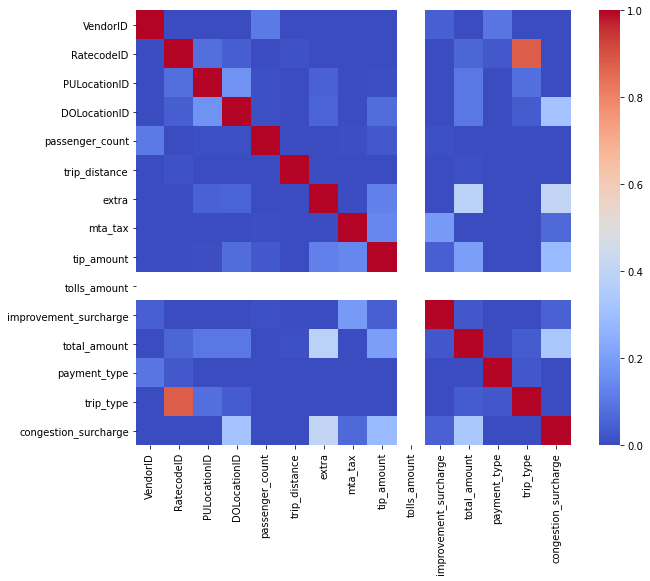

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop('fare_amount', axis=1).corr(),cmap='coolwarm',vmin=0, vmax=1,square=True)
plt.show();

### Feature Scaling

In [15]:
from dask_ml.preprocessing import RobustScaler

In [16]:
#Feature scaling for DASK dataframe
%time
transformer = RobustScaler().fit(df)
df=transformer.transform(df)

Wall time: 0 ns


In [17]:
from sklearn.preprocessing import RobustScaler

In [18]:
#Feature scaling pandas dataframe
%time
transformer1= RobustScaler().fit(df1)
df1= transformer1.transform(df1)

Wall time: 0 ns


In [22]:
#Convert numpy array after feature scaling to pandas dataframe
df2= pd.DataFrame(df1, columns = ['VendorID','RatecodeID','PULocationID','DOLocationID','passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','payment_type','trip_type','congestion_surcharge'])
df2

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,0.0,0.0,-0.018182,-0.343750,0.0,-0.150350,-0.375000,-0.5,0.0,0.00,0.0,0.0,-0.409226,0.0,0.0,0.00
1,0.0,0.0,-0.018182,-0.343750,0.0,-0.143357,-0.375000,-0.5,0.0,0.00,0.0,0.0,-0.409226,0.0,0.0,0.00
2,0.0,0.0,-0.018182,-0.343750,0.0,-0.206294,-0.375000,-0.5,0.0,0.00,0.0,0.0,-0.409226,0.0,0.0,0.00
3,0.0,0.0,-0.018182,-0.343750,0.0,-0.164336,-0.375000,-0.5,0.0,0.00,0.0,0.0,-0.409226,0.0,0.0,0.00
4,0.0,0.0,-0.018182,-0.343750,0.0,-0.279720,-0.375000,-0.5,0.0,0.00,0.0,0.0,-0.409226,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0.0,0.0,0.818182,0.484375,0.0,3.010490,2.416667,0.0,0.0,8.81,0.0,0.0,2.980655,-1.0,0.0,2.75
1048571,0.0,0.0,0.818182,0.523438,0.0,1.108392,0.666667,0.0,0.0,4.61,0.0,0.0,1.105655,-1.0,0.0,2.75
1048572,0.0,0.0,0.818182,-0.312500,0.0,1.895105,1.125000,0.0,0.0,2.50,0.0,0.0,1.357887,-1.0,0.0,2.75
1048573,0.0,0.0,0.818182,0.171875,0.0,0.636364,0.208333,0.0,0.0,3.51,0.0,0.0,0.614583,-1.0,0.0,2.75


## Machine Learning

#### Dependent and independent variables

In [23]:
# Dask Dataframe dependent and independent variables
X= df.drop(['VendorID','RatecodeID'],axis=1)
y= df[('total_amount')]

In [24]:
# pandas Dataframe dependent and independent variables
X1 = df2.drop(['VendorID','RatecodeID'], axis=1)
Y1 = df2['total_amount']

In [25]:
from dask_ml.model_selection import train_test_split

#### Split the data into training and testing set and set the random state to 100

In [26]:
# Dask data split intro training and testing sets
%time
xtrain, xtest, ytrain, ytest = train_test_split(X, y,train_size=0.7,  test_size=0.3,random_state=100)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

Wall time: 0 ns
(Delayed('int-06b236a2-707a-4a2d-8f23-6ccedaa608bc'), 14) (dd.Scalar<size-ag..., dtype=int32>,)
(Delayed('int-f97b0602-7e6f-4b98-918b-84bde1c9e866'), 14) (dd.Scalar<size-ag..., dtype=int32>,)


C:\Anaconda\lib\site-packages\dask_ml\model_selection\_split.py:462: FutureWarning: The default value for 'shuffle' must be specified when splitting DataFrames. In the future DataFrames will automatically be shuffled within blocks prior to splitting. Specify 'shuffle=True' to adopt the future behavior now, or 'shuffle=False' to retain the previous behavior.
  warnings.warn(


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Pandas data split intro training and testing data sets
%time
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X1, Y1, test_size=0.3,random_state=100)
print(xtrain1.shape, ytrain1.shape)
print(xtest1.shape, ytest1.shape)

Wall time: 0 ns
(734002, 14) (734002,)
(314573, 14) (314573,)


In [29]:
import xgboost
import dask_xgboost

### Training time using DASK dataframe dd vs. Pandas dataframe pd 

In [30]:
start_time = time.time()

params = {'objective':'reg:squarederror','nround': 1000, 
          'max_depth': 16, 'eta': 0.01, 'subsample': 0.5, 
          'min_child_weight': 1}
bst = dask_xgboost.train(client, params, xtrain, ytrain, num_boost_round=100)
bst
print("----------------------------------")
print(" | Dask training time:  %s seconds |" % (time.time() - start_time))
print("----------------------------------")

----------------------------------
 | Dask training time:  76.51860690116882 seconds |
----------------------------------


In [31]:
import xgboost as xgb

In [32]:
params1 = {'objective':'reg:squarederror','n_estimators':1000, 
          'max_depth': 16, 'eta': 0.01, 'subsample': 0.5, 
          'min_child_weight': 1}
reg_xgb = xgb.XGBRegressor(**params1,seed=25,nthread=1,random_state=100)

In [33]:
start_time = time.time()
reg_xgb.fit(xtrain1, ytrain1)
print("----------------------------------")
print(" | Pandas training time:  %s seconds |" % (time.time() - start_time))
print("----------------------------------")

----------------------------------
 | Pandas training time:  1279.772429227829 seconds |
----------------------------------


## Prediction

In [34]:
# Dask Dataframe prediction
%time
y_hat = dask_xgboost.predict(client, bst, xtest).persist()
y_hat.compute()

Wall time: 0 ns


array([-0.07581281, -0.07581281, -0.07581281, ...,  0.8778246 ,
        1.9313626 ,  0.6678274 ], dtype=float32)

In [35]:
# Pandas Dataframe prediction
%time
xgb_pred = reg_xgb.predict(xtest1)
xgb_pred

Wall time: 0 ns


array([ 0.27902764, -0.29758498, -0.5207888 , ..., -0.2603835 ,
        1.0602419 ,  0.11162405], dtype=float32)

#### Feature importance 

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

Wall time: 0 ns


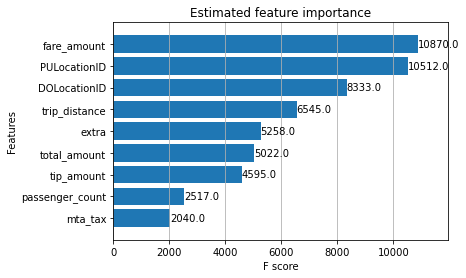

In [37]:
#Dask
%time
ax = xgboost.plot_importance(bst, height=0.8, max_num_features=9)
ax.grid(False, axis="y")
ax.set_title('Estimated feature importance')
plt.show()

Wall time: 0 ns


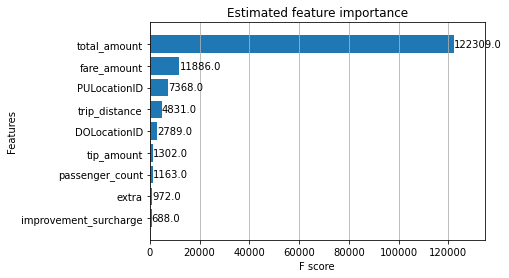

In [38]:
#Pandas
%time
bx = xgboost.plot_importance(reg_xgb, height=0.8, max_num_features=9)
bx.grid(False, axis="y")
bx.set_title('Estimated feature importance')
plt.show()

#### Result: Machine learning using Dask data frame is significantly faster than Pandas data frame because of parallel computing. Dask can be very useful when working with large datasets for machine learning as compared to Pandas dataframe which take significant amount of time. We can see the training times of both Dask and Pandas in this notebook.   